# Neural Network Classification with PyTorch

Classification is a problem of predicting wether something is one thing or another (there can be multiple things as the options)

## 1. Data

Making classification data and getting it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Making a 1000 samples
n_samples = 1000

# Create circle
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


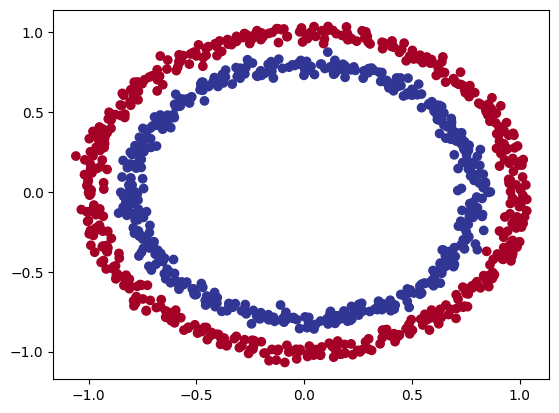

In [6]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and same for y: {y_sample}\n")
print(f"Shapes for one sample of X: {X_sample.shape} and same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and same for y: 1

Shapes for one sample of X: (2,) and same for y: ()


### 1.2 Turning data into tensors and create train and test spits

In [9]:
import torch
torch.__version__

'2.9.1+cu128'

In [10]:
# Turning data into tensors (Currently data is a Numpy array)
print(f"dtype of X: {X.dtype} and type of X: {type(X)}\n")
print(f"dtype of y: {y.dtype} and type of y: {type(y)}")

dtype of X: float64 and type of X: <class 'numpy.ndarray'>

dtype of y: int64 and type of y: <class 'numpy.ndarray'>


In [11]:
# Converting it Pytorch Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
print(f"dtype of X: {X.dtype} and type of X: {type(X)}\n")
print(f"dtype of y: {y.dtype} and type of y: {type(y)}")

dtype of X: torch.float32 and type of X: <class 'torch.Tensor'>

dtype of y: torch.float32 and type of y: <class 'torch.Tensor'>


### 1.3 Split data into training and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data is for testing and 80% is for training
                                                    random_state=42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 2. Build a Model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup deivce agnostic code
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we have set up device agnostic code, let us create a model that:

1. Subclasses `nn.Module` 

2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data

3. Define a `forward()` method that outlines the forward pass of the model
 
4. Instantiate an instance of our model class and send it to the target `device`

In [16]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create a 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

        # 3. Define a forward() method that outlines the forward pass
        def forward(self, x):
            return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output


# 4. Instantiate an instance of our model class and sent it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# To check on which device are the model parameters present
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
# Let us replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# # Another way
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.two_linear_layers = nn.Sequential(
#             nn.Linear(in_features=2, out_features=5),
#             nn.Linear(in_features=5, out_features=1) 
#         )

#         def forward(self, x):
#             return self.two_linear_layers(x)

# model_0 = CircleModelV0().to(device)
# model_0

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3414,  0.1662],
                      [-0.2327,  0.6083],
                      [-0.2772,  0.4231],
                      [ 0.0491, -0.1436],
                      [-0.6771,  0.2264]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5768, -0.6553,  0.6003,  0.2783, -0.6429], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2382, -0.2618, -0.0651,  0.2561,  0.2327]], device='cuda:0')),
             ('1.bias', tensor([0.0701], device='cuda:0'))])

In [21]:
# Making Predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of the predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of the predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 setup loss function and optimizer

Which loss function or optimizer to use?
This is problem specific

For example for regression --> we use MAE (Mean Absolute Error) or MSE (Mean Square Error)
For Classification --> Binary Cross Entropy or Categorical Cross Entropy

*the loss function measures how wrong our model's predictions are*

*And for optimizers, two of the most common and useful are SGD and Adam*

In [22]:
# Set up the loss function
#loss_fn = nn.BCELoss() -> requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [23]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

### 3. Train Model

1. Forward Pass
2. Calculate Loss
3. Zero Grad
4. Backpropagation
5. Gradient Descent

### 3.1 Going from raw logits -> predictions probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function:
1. Sigmoid for Binary Classification
2. Softmax for Multiclass Classification

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or by taking the  `argmax()`
1. round -> Binary 
2. argmax() -> Softmax

In [24]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0475],
        [-0.1415],
        [ 0.1317],
        [-0.0980],
        [ 0.0252]], device='cuda:0')

In [25]:
# Use sigmoid actiavtion function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4881],
        [0.4647],
        [0.5329],
        [0.4755],
        [0.5063]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class=1)
* `y_pred_probs` < 0.5 `y=0` (class=0)

Above written condition is called a Decesion Boundary

In [26]:
# Find the predicted label
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Building a training and testing loop

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Putting the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward Pass
    y_logits = model_0(X_train).squeeze() 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> prediction probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)  # BCEWithLogitsLoss expects raw logits as input
    
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward (Backpropagation)
    loss.backward()

    # 5. Optimizer step (Gradient Descent)
    optimizer.step()


    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69616, Acc: 49.00% | Test Loss: 0.69100, Test Acc: 52.50%
Epoch: 10 | Loss: 0.69587, Acc: 49.00% | Test Loss: 0.69099, Test Acc: 52.50%
Epoch: 20 | Loss: 0.69564, Acc: 49.00% | Test Loss: 0.69101, Test Acc: 53.50%
Epoch: 30 | Loss: 0.69543, Acc: 49.50% | Test Loss: 0.69104, Test Acc: 53.00%
Epoch: 40 | Loss: 0.69524, Acc: 49.38% | Test Loss: 0.69109, Test Acc: 53.00%
Epoch: 50 | Loss: 0.69508, Acc: 49.25% | Test Loss: 0.69114, Test Acc: 53.00%
Epoch: 60 | Loss: 0.69493, Acc: 49.38% | Test Loss: 0.69119, Test Acc: 52.50%
Epoch: 70 | Loss: 0.69480, Acc: 49.25% | Test Loss: 0.69125, Test Acc: 52.50%
Epoch: 80 | Loss: 0.69468, Acc: 49.12% | Test Loss: 0.69130, Test Acc: 52.00%
Epoch: 90 | Loss: 0.69457, Acc: 49.12% | Test Loss: 0.69136, Test Acc: 52.00%
Epoch: 100 | Loss: 0.69447, Acc: 49.25% | Test Loss: 0.69142, Test Acc: 52.00%
Epoch: 110 | Loss: 0.69438, Acc: 49.62% | Test Loss: 0.69147, Test Acc: 51.50%
Epoch: 120 | Loss: 0.69429, Acc: 49.75% | Test Loss: 0.69153, T

In [28]:
import requests
from pathlib import Path

# Downloading helper functions from Learn PyTorch repo (if it is not already downloaded)
if Path("helper_function.py").is_file():
    print("File already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

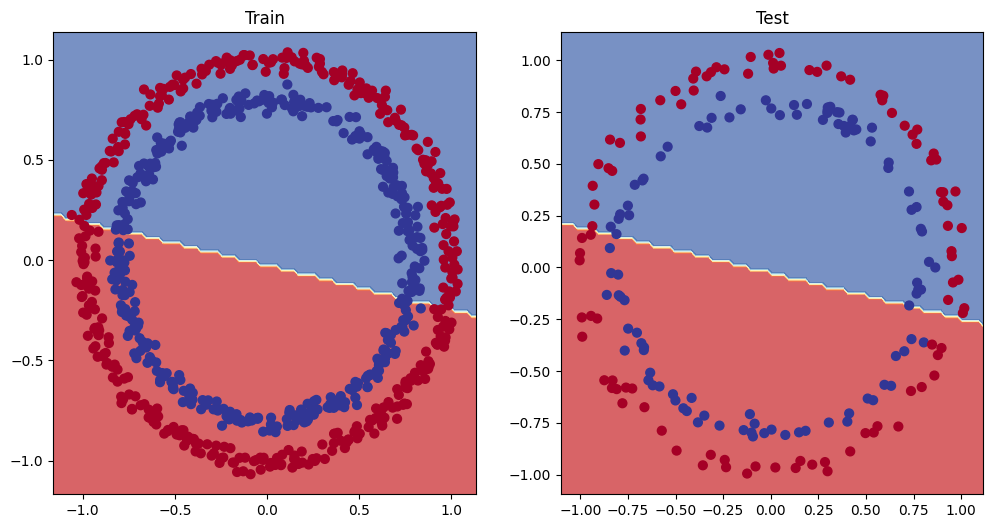

In [29]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)